In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3870 - loss: 1.6704 - val_accuracy: 0.5573 - val_loss: 1.2285
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6094 - loss: 1.1121 - val_accuracy: 0.6526 - val_loss: 0.9915
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6807 - loss: 0.9115 - val_accuracy: 0.6832 - val_loss: 0.9289
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7207 - loss: 0.7913 - val_accuracy: 0.7011 - val_loss: 0.8765
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7559 - loss: 0.6915 - val_accuracy: 0.6816 - val_loss: 0.9249
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7814 - loss: 0.6234 - val_accuracy: 0.7227 - val_loss: 0.8338
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.8046 - loss: 0.5491 - val_accuracy: 0.7166 - val_loss: 0.8417
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.8298 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7229 - loss: 0.9587
Test accuracy: 0.718999981880188


In [ ]:
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

In [ ]:
pred = model.predict(x_test[:1])
print("Predicted:", class_names[np.argmax(pred)])
print("Actual:", class_names[int(y_test[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted: cat
Actual: cat


/tmp/ipython-input-1834858849.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual:", class_names[int(y_test[0])])


In [ ]:
pred = model.predict(x_test)
print(pred.shape)     # should be (10000,10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
(10000, 10)


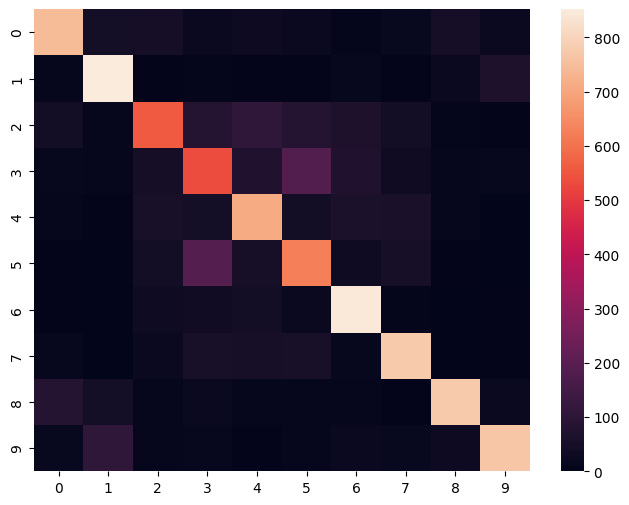

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_true = y_test.flatten()
y_pred = pred.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

    airplane       0.78      0.74      0.76      1000
  automobile       0.79      0.85      0.82      1000
        bird       0.67      0.56      0.61      1000
         cat       0.53      0.54      0.53      1000
        deer       0.66      0.71      0.68      1000
         dog       0.59      0.62      0.61      1000
        frog       0.74      0.84      0.79      1000
       horse       0.76      0.78      0.77      1000
        ship       0.85      0.78      0.81      1000
       truck       0.84      0.77      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
print("y_true shape:", y_true.shape)
print("pred shape:", pred.shape)
print("y_pred shape:", y_pred.shape)


y_true shape: (10000,)
pred shape: (1, 10)
y_pred shape: (1,)


In [ ]:
model.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134966382845136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382843792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382845712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382843216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382846096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382845904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382846480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382846288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382846864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134966382846672: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!pip install numpy==1.26.4 tf2onnx onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account

In [ ]:
!pip install -q tf2onnx onnx runtime
!python -m tf2onnx.convert \
  --saved-model saved_model \
  --output cnn_model.onnx \
  --opset 13

  Preparing metadata (setup.py) ... done
2026-02-20 09:22:58.550792: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-20 09:22:58.558632: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-20 09:22:58.575475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771579378.599598   24774 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771579378.607345   24774 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771579378.634789   24774 computation_placer.cc:177] computation placer already register